# Multilayer Perceptron and Backpropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1 

Consider the neural network considered in the first question of the theoretical component of the practical class, with number of units: 4,4,3,3.

![](https://drive.google.com/uc?id=1SHUgdosKp6AX8rRAACCZ5nb4kUXreI3g)

Assume all units, except the ones in the output layer, use the hyperbolic tangent activation function. 

Consider the following training example:

$\mathbf{x} =\begin{bmatrix} 1, 0, 1, 0 \end{bmatrix}^\intercal $,   $\mathbf{y} =\begin{bmatrix} 0\\ 1\\ 0 \end{bmatrix}$

❓ Using the squared error loss do a stochastic gradient descent update, initializing all connection weights and biases to 0.1 and a  learning rate η = 0.1:

1. Perform the forward pass
2. Compute the loss
3. Compute gradients with backpropagation
4. Update weights

In [169]:
inputs = np.array([[1, 0, 1, 0]])
print(inputs.shape)
labels = np.array([[0, 1, 0]])

# First is input size, last is output size.
units = [4, 4, 3, 3]

init_value = 0.1
# Initialize weights with correct shapes 
w1 = np.full((4,4), init_value)
w2 = np.full((4,4), init_value)
w3 = np.full((4,3), init_value)
w4 = np.full((3,3), init_value)

b1 = np.full((4,1), init_value)
b2 = np.full((4,1), init_value)
b3 = np.full((3,1), init_value)
b4 = np.full((3,1), init_value)

eta = 0.1

(1, 4)


In [59]:
# Forward Pass

z1 = w1.T @ inputs.T + b1
h1 = np.tanh(z1)
z2 = w2.T @ h1 + b2
h2 = np.tanh(z2)
z3 = w3.T @ h2 + b3
h3 = np.tanh(z3)
z4 = w4.T @ h3 + b4

print(z4)



[[0.15495698]
 [0.15495698]
 [0.15495698]]


In [60]:
# Loss
sseLoss = np.sum((z4-labels) ** 2)
print(sseLoss)

print(labels, z4)
loss = -(labels.T - z4) 


2.2863631045079966
[[0 1 0]] [[0.15495698]
 [0.15495698]
 [0.15495698]]


In [61]:
# Backpropagation

dw4 = loss @ h3.T
db4 = loss
dh3 = w4 @ loss
# print(dz3, 1-np.tanh(h3)**2)
loss3 = np.multiply(dh3, 1 - np.tanh(z3)**2)
w4 = w4 - eta * dw4.T
b4 = b4 - eta * db4 


dw3 = loss3 @ h2.T
db3 = loss3
dh2 = w3 @ loss3
loss2 = np.multiply(dh2, 1 - np.tanh(z2)**2)
w3 = w3 - eta * dw3.T
b3 = b3 - eta * db3 

dw2 = loss2 @ h1.T
db2 = loss2
dh1 = w2 @ loss2
loss1 = np.multiply(dh1, 1 - np.tanh(z1)**2) 
w2 = w2 - eta * dw2.T
b2 = b2 - eta * db2

dw1 = loss1 @ inputs
db1 = loss1
w1 = w1 - eta * dw1.T
b1 = b1 - eta * db1



In [77]:
# Update Gradients

# Gradient updates.

print(w1, b1)
print(w2, b2)
print(w3, b3)
print(w4, b4)

[[0.10034438 0.10034438 0.10034438 0.10034438]
 [0.1        0.1        0.1        0.1       ]
 [0.10034438 0.10034438 0.10034438 0.10034438]
 [0.1        0.1        0.1        0.1       ]] [[0.10034438]
 [0.10034438]
 [0.10034438]
 [0.10034438]]
[[0.10027413 0.10027413 0.10027413 0.10027413]
 [0.10027413 0.10027413 0.10027413 0.10027413]
 [0.10027413 0.10027413 0.10027413 0.10027413]
 [0.10027413 0.10027413 0.10027413 0.10027413]] [[0.10094032]
 [0.10094032]
 [0.10094032]
 [0.10094032]]
[[0.10070025 0.10070025 0.10070025]
 [0.10070025 0.10070025 0.10070025]
 [0.10070025 0.10070025 0.10070025]
 [0.10070025 0.10070025 0.10070025]] [[0.10327901]
 [0.10327901]
 [0.10327901]]
[[0.08231716 0.13536569 0.08231716]
 [0.08231716 0.13536569 0.08231716]
 [0.08231716 0.13536569 0.08231716]] [[0.0037264 ]
 [0.29254719]
 [0.0037264 ]]


❓ Let's say we were using the same training example but with the following changes:
- The output units have a softmax activation function
- The error function is cross-entropy

Keeping the same initializations and learning rate, adjust your computations to the new changes.

**Solution:** We need only to change:  
- the output, *i.e.*, $\hat{y} = softmax(z_3)$ instead of $\hat{y} = z_3$
- the loss computation to $L = -y.log(\hat{y})$
- the gradient of the loss with respect to $z_3$: $\frac{dL}{dz_3}$

All other steps remain unchanged.

In [76]:
# Your code here

# Forward Pass

z1 = w1.T @ inputs.T + b1
h1 = np.tanh(z1)
z2 = w2.T @ h1 + b2
h2 = np.tanh(z2)
z3 = w3.T @ h2 + b3
h3 = np.tanh(z3)
z4 = w4.T @ h3 + b4
h4 = np.exp(z4) / np.sum(np.exp(z4))


#loss

loss = -labels * np.log(h4)

dloss = h4 - labels.T

print(dloss)

# Backpropagation

dw4 = dloss @ h3.T
db4 = dloss
dh3 = w4 @ dloss
print(dh3, 1-np.tanh(h3)**2)
loss3 = np.multiply(dh3, 1 - np.tanh(z3)**2)
w4 = w4 - eta * dw4.T
b4 = b4 - eta * db4 


dw3 = loss3 @ h2.T
db3 = loss3
dh2 = w3 @ loss3
loss2 = np.multiply(dh2, 1 - np.tanh(z2)**2)
w3 = w3 - eta * dw3.T
b3 = b3 - eta * db3 

dw2 = loss2 @ h1.T
db2 = loss2
dh1 = w2 @ loss2
loss1 = np.multiply(dh1, 1 - np.tanh(z1)**2) 
w2 = w2 - eta * dw2.T
b2 = b2 - eta * db2

dw1 = loss1 @ inputs
db1 = loss1
w1 = w1 - eta * dw1.T
b1 = b1 - eta * db1

[[ 0.30851477]
 [-0.61702954]
 [ 0.30851477]]
[[-0.02218469]
 [-0.02218469]
 [-0.02218469]] [[0.96664813]
 [0.96664813]
 [0.96664813]]


❓ Complete functions `forward`, `compute_loss`, `backpropagation` and `update_weights` generalized to perform the same computations as before, but for any MLP architecture.

In [360]:
'''
x: single observation of shape (n,)
weights: list of weight matrices [W1, W2, ...]
biases: list of biases matrices [b1, b2, ...]

y: final output
hiddens: list of computed hidden layers [h1, h2, ...]
'''

def forward(x, weights, biases):
    # print(x)
    num_layers = len(weights)
    g = np.tanh
    hiddens = [] 
    h = x.reshape((64,1))
    # compute hidden layers
    for i in range(num_layers):
        z = weights[i] @ h + biases[i]
        h = g(z)
        hiddens.append(h)

    hiddens = hiddens[:-1]

    #compute output
    output = z
    
    return output, hiddens

def compute_loss(output, y):
    # compute loss
    y = y.reshape((1,y.size))
    probs = np.exp(output) / np.sum(np.exp(output))

    loss = np.sum(- y.T * np.log(probs))
    return loss   

def backward(x, y, output, hiddens, weights):
    y = y.reshape((y.size,1))
    x = x.reshape((x.size, 1))
    num_layers = len(weights)
    g = np.tanh
    z = output

    probs = np.exp(output) / np.sum(np.exp(output))
    grad_z = probs - y
    
    grad_weights = []
    grad_biases = []
    
    # Backpropagate gradient computations 
    for i in range(num_layers-1, -1, -1):
        # Gradient of hidden parameters.
        if i == 0: 
            grad_weights.append(grad_z @ x.T)
            grad_biases.append(grad_z)
            break

        grad_weights.append(grad_z @ hiddens[i-1].T)
        grad_biases.append(grad_z)
        dh = weights[i].T @ grad_z
        grad_z = np.multiply(dh, 1 - hiddens[i-1]**2) 
                
    # Making gradient vectors have the correct order
    grad_weights.reverse()
    grad_biases.reverse()
    return grad_weights, grad_biases

## Question 2

Now we will use the MLP on real data to classify handwritten digits.

Data is loaded, split into train and test sets and target is one-hot encoded below:

In [241]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data = load_digits()

inputs = data.data  
labels = data.target  
n, p = np.shape(inputs)
n_classes = len(np.unique(labels))


X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Encode labels as one-hot vectors.
one_hot = np.zeros((np.size(y_train, 0), n_classes))
for i in range(np.size(y_train, 0)):
    one_hot[i, y_train[i]] = 1
y_train_ohe = one_hot
one_hot = np.zeros((np.size(y_test, 0), n_classes))
for i in range(np.size(y_test, 0)):
    one_hot[i, y_test[i]] = 1
y_test_ohe = one_hot

❓ Complete function `MLP_train_epoch` using your previously defined functions to compute one epoch of training using SGD:

In [359]:
'''
Outputs:
    - weights: list of updated weights
    - biases: list of updated 
    - loss: scalar of total loss (sum for all observations)

'''

def MLP_train_epoch(inputs, labels, weights, biases, eta):
    num_layers = len(weights)
    total_loss = 0
    # For each observation and target
    for x, y in zip(inputs, labels):   
        # Compute forward pass
        # print("_________FORWARD___________")
        
        output, hiddens = forward(x, weights, biases)
        # print("____________________")
        # Compute Loss and update total loss
        total_loss += compute_loss(output, y)
        
        # Compute backpropagation
        grad_w, grad_b = backward(x, y, output, hiddens, weights)

        
        # Update weights
        for i in range(num_layers):
            weights[i] -= eta * grad_w[i]
            biases[i] -= eta * grad_b[i]
        
            
    return weights, biases, total_loss

Let's use a MLP with a single hidden layer of 50 units and a learning rate of $0.001$. 

❓ Run 100 epochs of your MLP. Save the loss at each epoch in a list and plot the loss evolution after training.

__________epoch 0___________
train:  0.27279053583855256
test:  0.2638888888888889
__________epoch 25___________
train:  0.8858733472512178
test:  0.8055555555555556
__________epoch 50___________
train:  0.9269311064718163
test:  0.85
__________epoch 75___________
train:  0.942936673625609
test:  0.8694444444444445


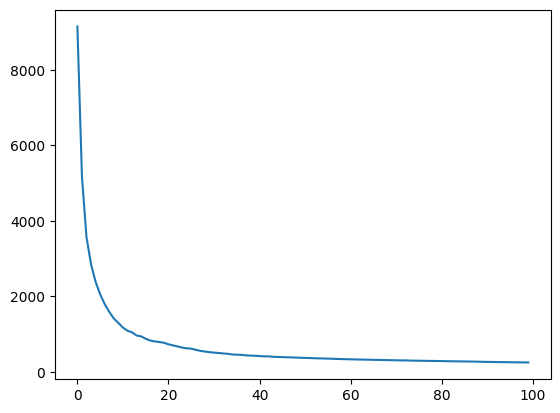

In [376]:
# Initialize weights
w = [np.random.randn(50,64), np.random.randn(10,50)]
b = [np.full((50,1), 0.0), np.full((10,1), 0.0)]

# Empty loss list
loss = [0] * 100

# Learning rate.
eta = 0.001
    
    
# Run epochs and append loss to list
for i in range(100):
    w, b, loss[i] = MLP_train_epoch(X_train, y_train_ohe, w, b, eta)
    if not i%25:
        train = MLP_predict(X_train,w,b)
        test = MLP_predict(X_test,w,b)
        print(f"__________epoch {i}___________")
        print("train: ", np.sum(np.equal(train, y_train))/ y_train.size)
        print("test: ", np.sum(np.equal(test, y_test))/ y_test.size)
# Plot loss evolution


plt.plot(loss)
plt.show()


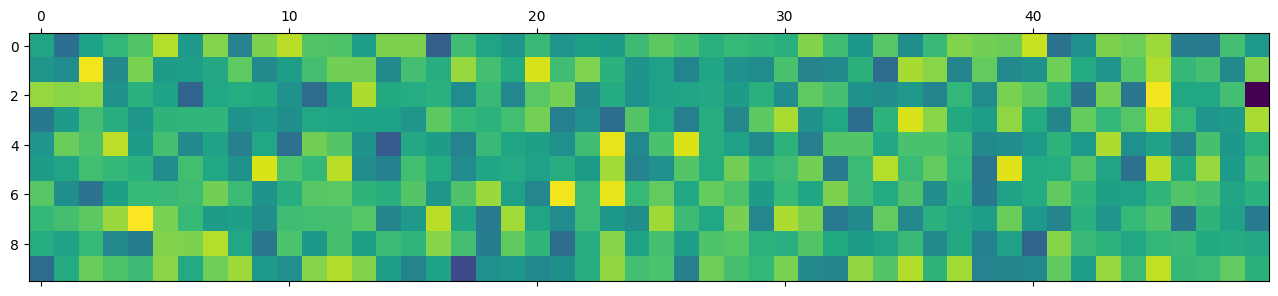

In [377]:
plt.matshow(w[1])


❓ Complete function `MLP_predict` to get array of predictions from your trained MLP:

In [363]:
def MLP_predict(inputs, weights, biases):
    predicted_labels = []
    for x in inputs:
        o,h = forward(x,weights,biases)
        pred = np.argmax(o)
        # Compute forward pass and get the class with the highest probability
        predicted_labels.append(pred)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

❓ Compute the accuracy on the train and test sets.

In [378]:
train = MLP_predict(X_train,w,b)
test = MLP_predict(X_test,w,b)

print(np.sum(np.equal(train, y_train))/ y_train.size)
print(np.sum(np.equal(test, y_test))/ y_test.size)

0.9512874043145442
0.8777777777777778


We can compare our results with Sklearn's implementation of the MLP. Compare their accuracies:

In [367]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50),
                    activation='tanh',
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    nesterovs_momentum=False,
                    random_state=1,
                    max_iter=1000)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9993041057759221
0.9722222222222222
